# Machine Learning Lab 2: EDA and Supervised Learning

## Oleksii Verkhola, DA-12, 2024

Importing the modules and data used in this lab.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

Exploratory Data Analysis on both Training and Testing data

In [3]:
print(f'Training Data shape: {train_data.shape}')
train_data.sample(5)

Training Data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
86555,200446,0,Cash loans,F,N,Y,0,135000.0,760225.5,30280.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
115214,233609,0,Revolving loans,F,N,Y,0,85500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
173588,301161,0,Cash loans,M,N,Y,0,135000.0,1211049.0,35541.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6354,107413,0,Revolving loans,F,N,N,0,72000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
63954,174159,0,Cash loans,F,N,N,0,99000.0,450000.0,14517.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f'Training Data shape: {test_data.shape}')
test_data.sample(5)

Training Data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35869,362426,Cash loans,F,N,Y,0,135000.0,450000.0,35685.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
29212,312866,Cash loans,F,N,N,0,225000.0,1096020.0,48406.5,900000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22338,262354,Cash loans,F,N,Y,1,117000.0,318528.0,19615.5,252000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
10894,179150,Cash loans,F,N,Y,0,112500.0,216000.0,11155.5,216000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
12703,192490,Cash loans,F,Y,Y,0,270000.0,1483650.0,61357.5,1350000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [5]:
train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [6]:
test_data.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [7]:
train_missing = train_data.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False).to_frame(name='Missing % from total')
print(train_missing / len(train_data) * 100.0)

                          Missing % from total
COMMONAREA_MEDI                      69.872297
COMMONAREA_AVG                       69.872297
COMMONAREA_MODE                      69.872297
NONLIVINGAPARTMENTS_MEDI             69.432963
NONLIVINGAPARTMENTS_MODE             69.432963
...                                        ...
EXT_SOURCE_2                          0.214626
AMT_GOODS_PRICE                       0.090403
AMT_ANNUITY                           0.003902
CNT_FAM_MEMBERS                       0.000650
DAYS_LAST_PHONE_CHANGE                0.000325

[67 rows x 1 columns]


In [8]:
test_missing = test_data.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False).to_frame(name='Missing % from total')
print(test_missing / len(test_data) * 100.0)

                          Missing % from total
COMMONAREA_MODE                      68.716150
COMMONAREA_MEDI                      68.716150
COMMONAREA_AVG                       68.716150
NONLIVINGAPARTMENTS_MEDI             68.412523
NONLIVINGAPARTMENTS_AVG              68.412523
...                                        ...
OBS_60_CNT_SOCIAL_CIRCLE              0.059495
DEF_30_CNT_SOCIAL_CIRCLE              0.059495
OBS_30_CNT_SOCIAL_CIRCLE              0.059495
AMT_ANNUITY                           0.049237
EXT_SOURCE_2                          0.016412

[64 rows x 1 columns]


Both training and testing data have missing data.

In [9]:
train_data[train_data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [10]:
test_data[test_data.duplicated()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Both sets have no duplicates.

In [11]:
train_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [12]:
test_data.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


TARGET
0    0.919271
1    0.080729
Name: count, dtype: float64


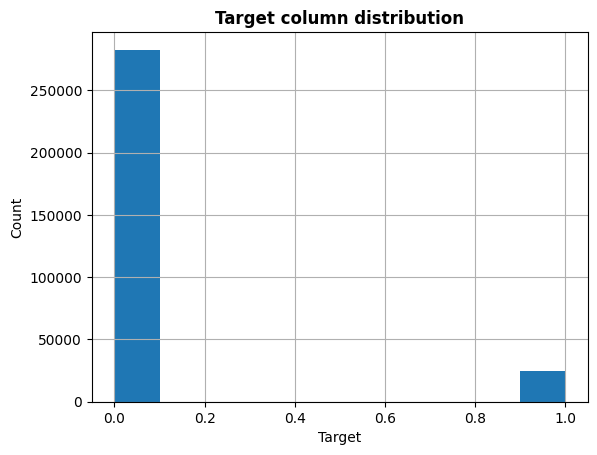

In [13]:
print(train_data['TARGET'].value_counts() / train_data['TARGET'].count())

plt.hist(x=train_data['TARGET'])
plt.grid(True)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target column distribution',fontweight = 'bold')

plt.show()

The distribution is obviously heavily biased towards 0, with over 91% values tending towards it, therefore, the model may turn out to be biased as well.

## Column value types

In [14]:
print(train_data.dtypes.value_counts())

float64    65
int64      41
object     16
Name: count, dtype: int64


Let's separate the values into categorical and numerical.
First, categorical:

In [15]:
categorical = train_data.select_dtypes('object').nunique().index.to_list() 
# according to the description, all columns that start with FLAG, REG, REGION and LIVE are also categorical, but use integers to represent their value.
categorical = categorical + train_data.filter(like='FLAG').columns.tolist() + train_data.filter(like='REG').columns.tolist() + train_data.filter(like='LIVE').columns.tolist()
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIE

Naturally, the rest of the columns will be numerical. We'll remove the first one from the list, as it simply counts up the ID.

In [16]:
numerical = list(set(train_data.nunique().index.to_list()) - set(categorical))
numerical.remove('SK_ID_CURR')
numerical

['ELEVATORS_AVG',
 'ENTRANCES_MEDI',
 'CNT_CHILDREN',
 'LIVINGAPARTMENTS_MEDI',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'LANDAREA_MODE',
 'OWN_CAR_AGE',
 'EXT_SOURCE_2',
 'TOTALAREA_MODE',
 'ELEVATORS_MEDI',
 'LANDAREA_MEDI',
 'FLOORSMAX_AVG',
 'AMT_ANNUITY',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_3',
 'LIVINGAREA_AVG',
 'AMT_CREDIT',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'LIVINGAPARTMENTS_AVG',
 'CNT_FAM_MEMBERS',
 'FLOORSMIN_AVG',
 'COMMONAREA_MEDI',
 'DAYS_EMPLOYED',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'LIVINGAREA_MODE',
 'COMMONAREA_AVG',
 'APARTMENTS_AVG',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'DAYS_LAST_PHONE_CHANGE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'LANDAREA_AVG',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'HOUR_APPR_PROCESS_STA

Distribution for both data types

In [17]:
train_data[categorical].describe()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,0.000042,0.710023,0.000081,0.015115,...,2.031521,0.015144,0.050769,0.040659,0.078173,0.230454,0.015144,0.040659,0.078173,0.179555
std,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.006502,0.453752,0.009016,0.122010,...,0.502737,0.122126,0.219526,0.197499,0.268444,0.421124,0.122126,0.197499,0.268444,0.383817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
train_data[numerical].describe()

,ELEVATORS_AVG,ENTRANCES_MEDI,CNT_CHILDREN,LIVINGAPARTMENTS_MEDI,AMT_REQ_CREDIT_BUREAU_YEAR,LANDAREA_MODE,OWN_CAR_AGE,EXT_SOURCE_2,TOTALAREA_MODE,ELEVATORS_MEDI,...,YEARS_BUILD_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,FLOORSMIN_MEDI,DAYS_ID_PUBLISH,APARTMENTS_MEDI,FLOORSMAX_MEDI,NONLIVINGAREA_MODE,LIVINGAREA_MEDI,BASEMENTAREA_AVG
count,143620.000000,152683.000000,307511.000000,97312.000000,265992.000000,124921.000000,104582.000000,3.068510e+05,159080.000000,143620.000000,...,103023.000000,306490.000000,265992.000000,98869.000000,307511.000000,151450.000000,154491.000000,137829.000000,153161.000000,127568.000000
mean,0.078942,0.149213,0.417052,0.101954,1.899974,0.064958,12.061091,5.143927e-01,0.102547,0.078078,...,0.755746,1.422245,0.034362,0.231625,-2994.202373,0.117850,0.225897,0.027022,0.108607,0.088442
std,0.134576,0.100368,0.722121,0.093642,1.869295,0.081750,11.944812,1.910602e-01,0.107462,0.134467,...,0.112066,2.400989,0.204685,0.161934,1509.450419,0.109076,0.145067,0.070254,0.112260,0.082438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.069000,0.000000,0.051300,0.000000,0.016600,5.000000,3.924574e-01,0.041200,0.000000,...,0.691400,0.000000,0.000000,0.083300,-4299.000000,0.058300,0.166700,0.000000,0.045700,0.044200
50%,0.000000,0.137900,0.000000,0.076100,1.000000,0.045800,9.000000,5.659614e-01,0.068800,0.000000,...,0.758500,0.000000,0.000000,0.208300,-3254.000000,0.086400,0.166700,0.001100,0.074900,0.076300
75%,0.120000,0.206900,1.000000,0.123100,3.000000,0.084100,15.000000,6.636171e-01,0.127600,0.120000,...,0.825600,2.000000,0.000000,0.375000,-1720.000000,0.148900,0.333300,0.023100,0.130300,0.112200
max,1.000000,1.000000,19.000000,1.000000,25.000000,1.000000,91.000000,8.549997e-01,1.000000,1.000000,...,1.000000,348.000000,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's encode the categorical features using LabelEncoder and align them so the columns match (with the exception of the target column for our training data).

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in categorical:
    if len(list(train_data[i].unique())) <= 2:
        train_data[i] = label_encoder.fit_transform(train_data[i])
        test_data[i] = label_encoder.transform(test_data[i])
        
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

temp = train_data['TARGET']
train_data, test_data = train_data.align(test_data, join = 'inner', axis=1)
train_data['TARGET'] = temp

print(f'Train Data: {train_data.shape}')
print(f'Test Data: {test_data.shape}')

Train Data: (307511, 240)
Test Data: (48744, 239)


Let's replace the empty cells with the mean to fill out the data.

In [20]:
from sklearn.impute import SimpleImputer

temp = train_data['TARGET']
train_data = train_data.drop(columns=['TARGET'])

simple_imputer = SimpleImputer(strategy='mean')
train_data = pd.DataFrame(simple_imputer.fit_transform(train_data), columns = train_data.columns)
test_data = pd.DataFrame(simple_imputer.transform(test_data), columns = test_data.columns)

train_data['TARGET'] = temp

train_data.isnull().sum()
test_data.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
                                  ..
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
Length: 239, dtype: int64

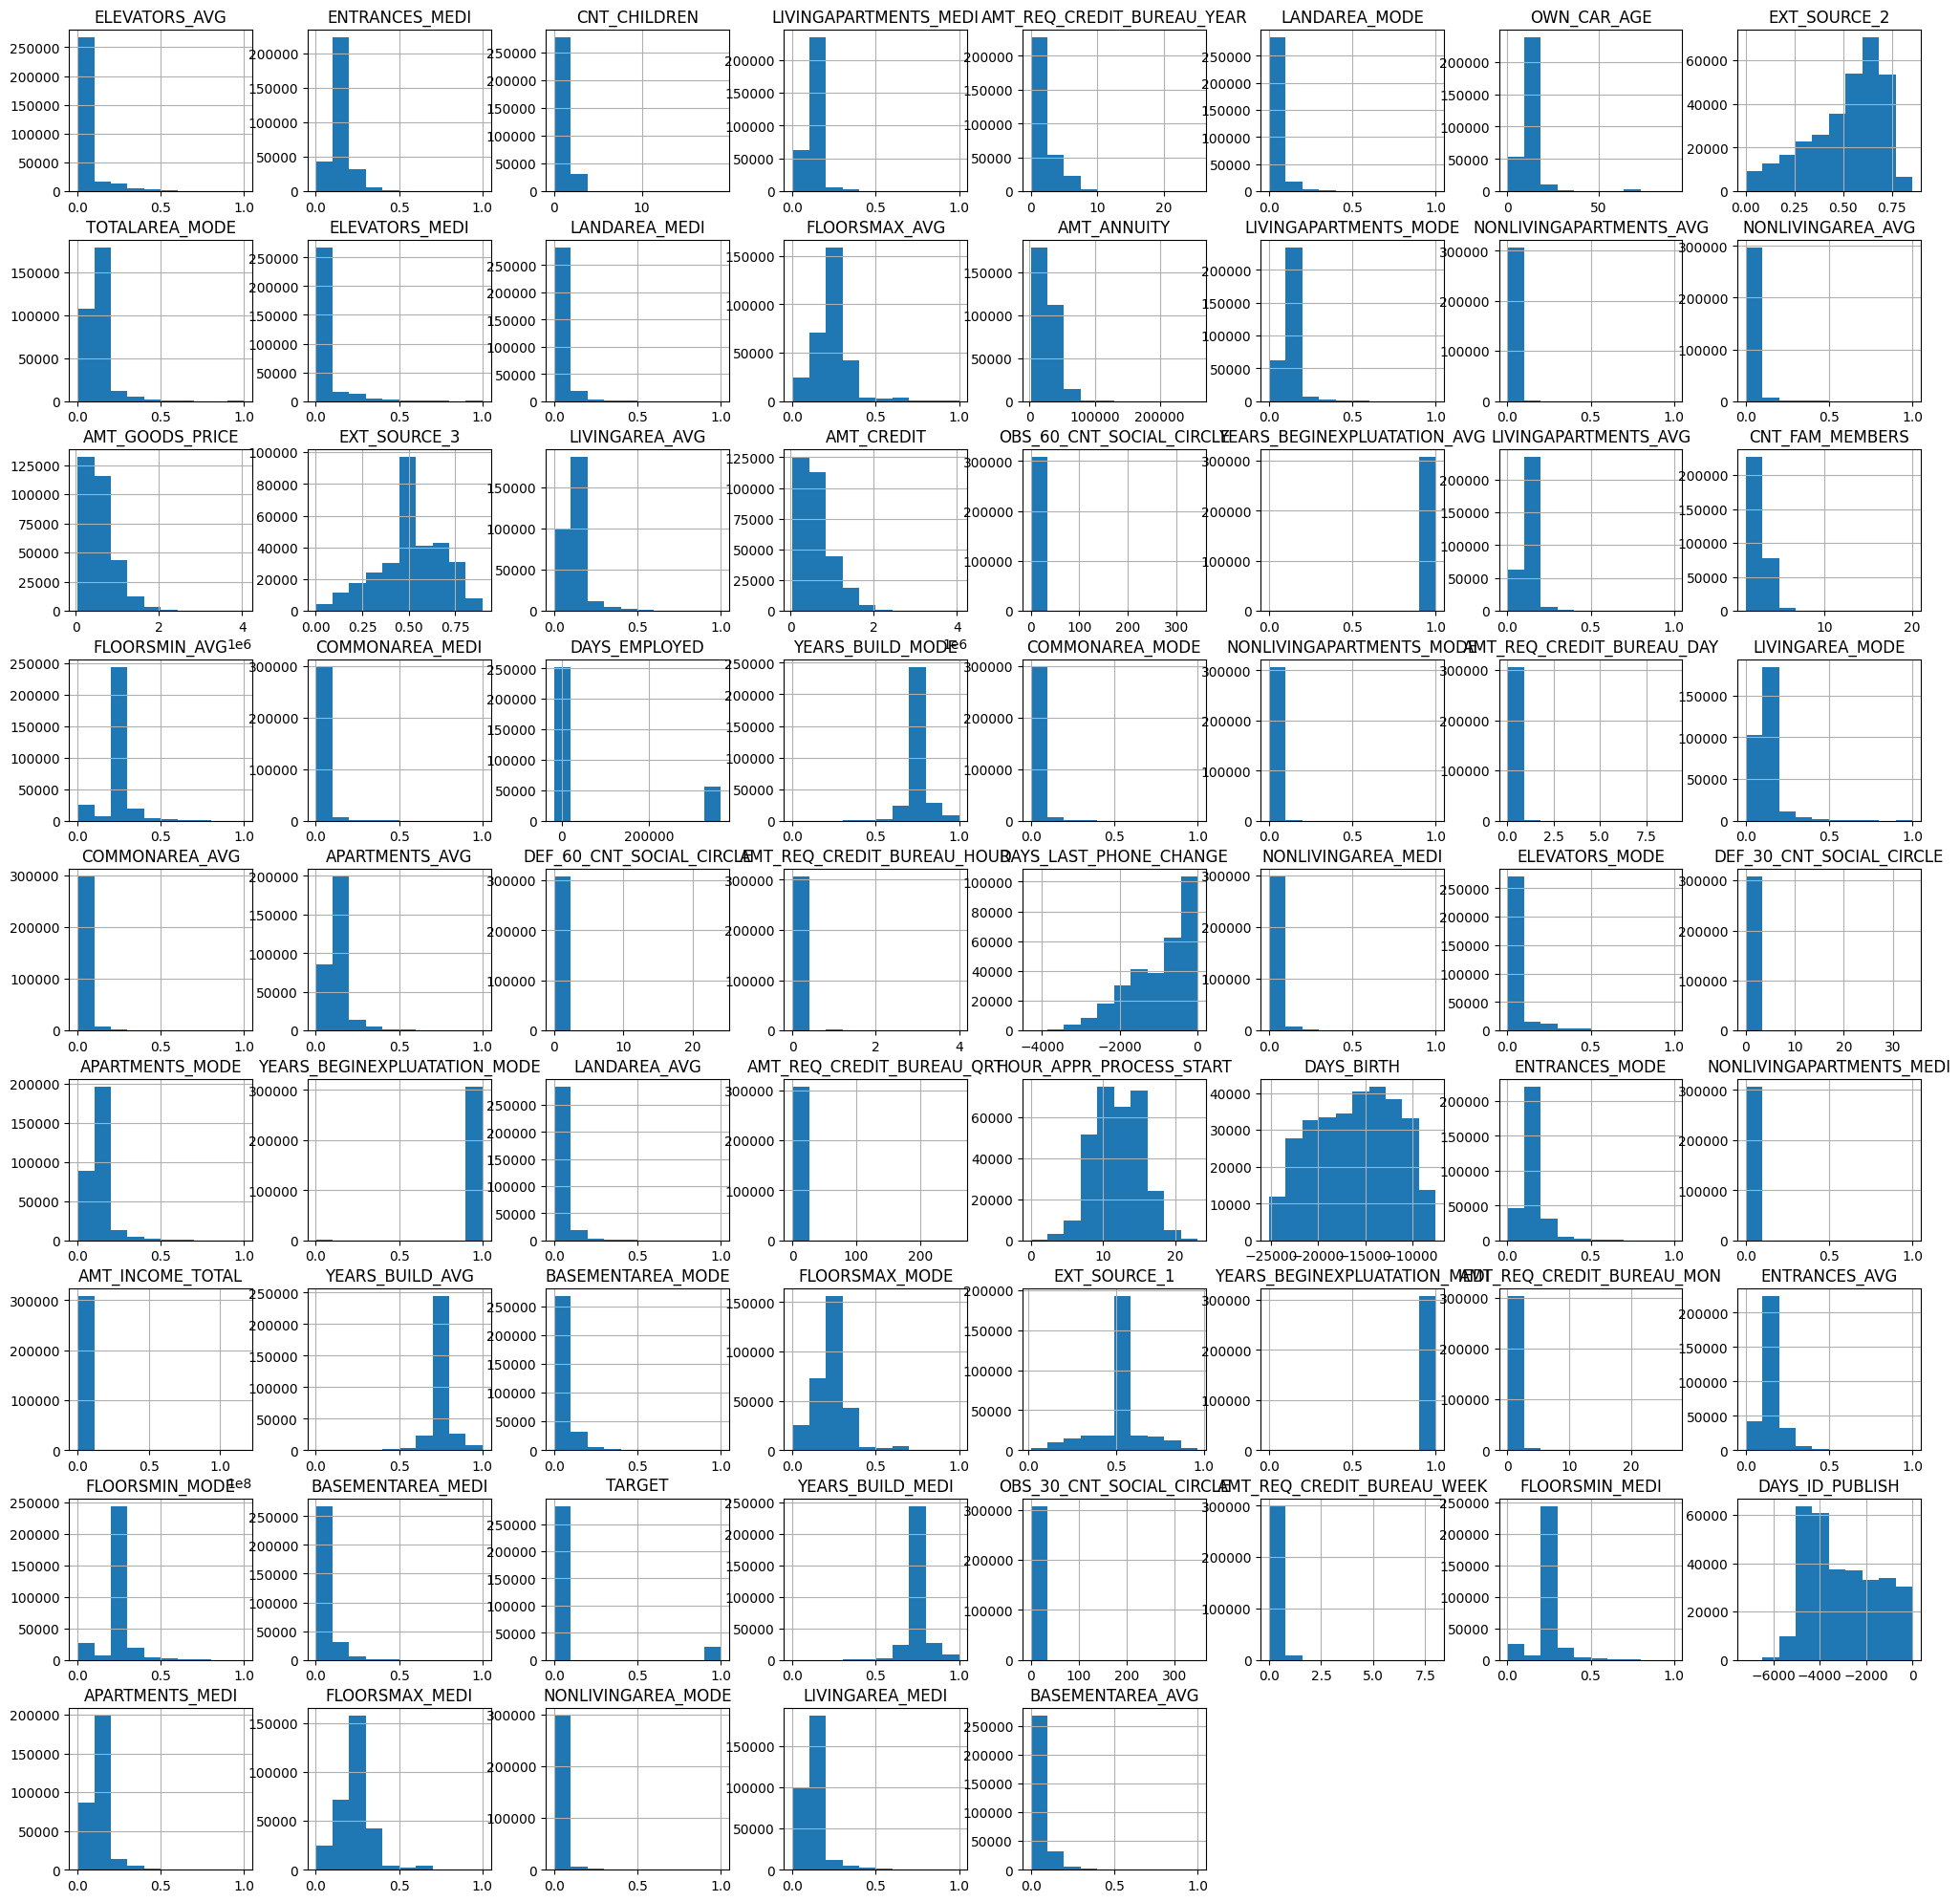

In [21]:
train_data[numerical].hist(figsize=(25, 25))
plt.show()

We can spot an obvious outlier in the DAYS_EMPLOYED graph, compared to other graphs for DAYS. Zooming into it we can see:

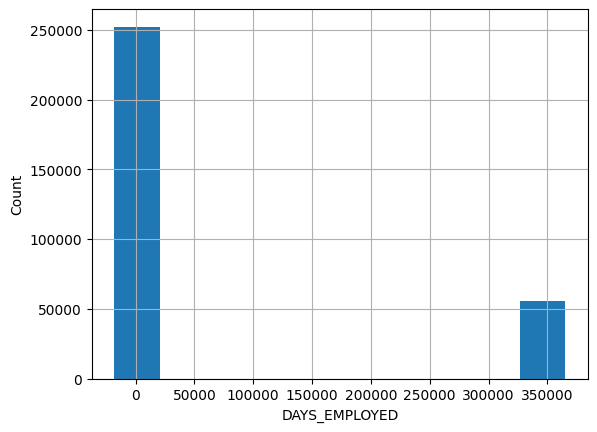

In [22]:
train_data['DAYS_EMPLOYED'].hist()
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Count')
plt.show()

In [23]:
train_data['DAYS_EMPLOYED'].loc[lambda x : x>0].value_counts()

DAYS_EMPLOYED
365243.0    55374
Name: count, dtype: int64

Let's remove those outliers and replace them with the mean.

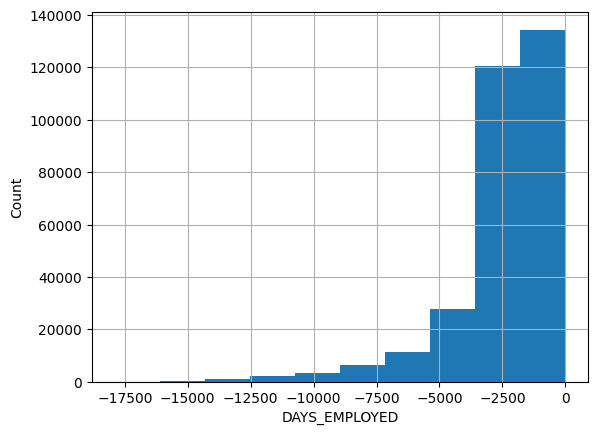

In [24]:
train_data['DAYS_EMPLOYED'] = train_data['DAYS_EMPLOYED'].replace({365243: np.nan})
train_data['DAYS_EMPLOYED'] = train_data['DAYS_EMPLOYED'].fillna(train_data['DAYS_EMPLOYED'].mean())

test_data['DAYS_EMPLOYED'] = test_data['DAYS_EMPLOYED'].replace({365243: np.nan})
test_data['DAYS_EMPLOYED'] = test_data['DAYS_EMPLOYED'].fillna(test_data['DAYS_EMPLOYED'].mean())

train_data['DAYS_EMPLOYED'].hist()
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Count')
plt.show()

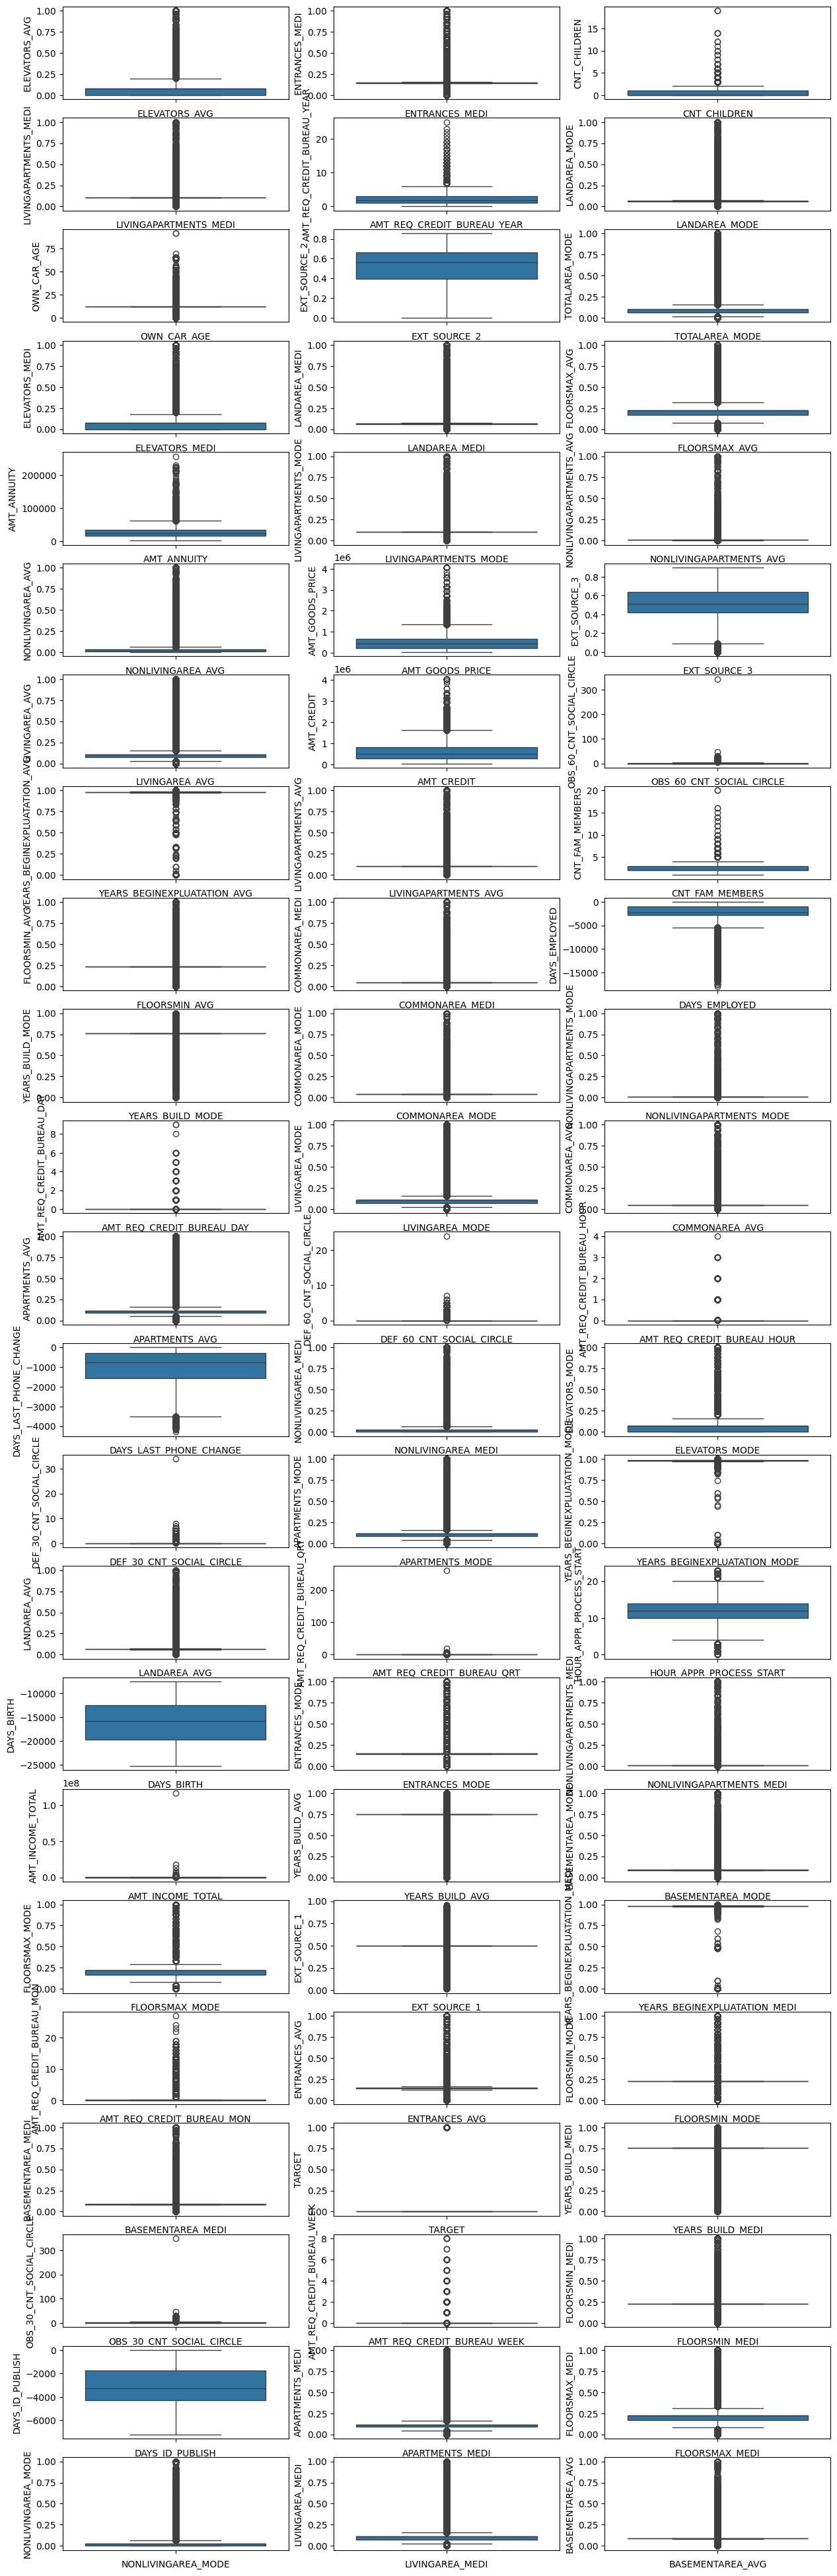

In [25]:
fig, axes = plt.subplots(nrows=len(numerical) // 3, ncols=3)
fig.set_size_inches(15, 50)
for i, col in enumerate(numerical):
    axis = axes[i//3, i%3]
    sns.boxplot(train_data[col], ax=axis)
    axis.set_xlabel(col)
plt.show()

It's obvious that there are **many** outliers in every single graph, so we need to remove those and replace them with the mean next.

In [26]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

def remove_outliers(data):
    for col in numerical:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        data[col] = np.where((data[col] < lower) | (data[col] > upper), np.nan, data[col])
        data[col] = data[col].fillna(data[col].mean())

numerical.remove('TARGET')
train_data[numerical] = standard_scaler.fit_transform(train_data[numerical])
test_data[numerical] = standard_scaler.transform(test_data[numerical])
remove_outliers(train_data)

To prepare for training, let's remove the column containing the IDs.

In [27]:
train_data.drop('SK_ID_CURR', axis=1)
test_data.drop('SK_ID_CURR', axis=1)

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0.0,0.0,1.0,-0.577538,-0.142533,-0.075097,-0.451796,-0.239375,0.018850,-0.734193,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,-0.577538,-0.294354,-0.934825,-0.671930,-0.970530,0.035792,-0.464485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,-0.577538,0.142129,0.159601,2.943984,0.248061,0.019101,-0.916824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,2.192084,0.616567,2.424840,1.511714,2.807103,0.026392,0.472274,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.807273,0.047242,0.065776,0.342115,0.235875,0.010032,0.686757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.0,0.0,1.0,-0.577538,-0.199466,-0.463281,-0.664789,-0.726812,0.002042,-0.901242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,0.0,0.0,0.0,2.192084,-0.047646,0.058106,0.331248,-0.117516,0.035792,1.111598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,0.0,1.0,1.0,0.807273,0.142129,-0.705672,0.420668,-0.604953,0.026392,0.026351,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
48742,0.0,0.0,0.0,-0.577538,0.237017,-0.370260,-0.136653,-0.239375,0.018850,0.474107,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Finally, lets train our model using logistic regression and submit the results for testing.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [29]:
data = train_data.drop(columns = ['TARGET'])
x_train, x_val, y_train, y_val  = train_test_split(data, train_data['TARGET'], test_size = 0.2)

logRegModel = LogisticRegression(class_weight = 'balanced', max_iter = 3000, tol = 0.001)
logRegModel.fit(x_train, y_train)
predict_train = logRegModel.predict(x_train)
print(roc_auc_score(y_train, predict_train))
predict_test = logRegModel.predict(x_val)
print(roc_auc_score(y_val, predict_test))

C:\Users\Ace Muffins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6714821968716594
0.6675910581779546


In [30]:
submission = pd.DataFrame(test_data['SK_ID_CURR'].astype(int))
submission['TARGET'] = logRegModel.predict_proba(test_data)[:, 1]
submission.to_csv('./submission.csv', index=False)

![submission](img/submission.png)